In [2]:
# import the libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [41]:
# Read the dataset
df = pd.read_excel("//Users//maverick//Downloads//Online Retail.xlsx")

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   month        541909 non-null  int64         
 9   Total_Cost   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 41.3+ MB


In [5]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [26]:
# Remove white spaces from the "description" column
df['Description'] = df['Description'].str.strip()


In [8]:
# Calculate the total cost 

In [43]:
df['Total_Cost'] = df.Quantity * df.UnitPrice

In [7]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
df.StockCode.nunique()

4070

In [23]:
df.Country.nunique()

38

In [9]:
Total_Revenue = df.Total_Cost.sum()

In [10]:
Total_Revenue

9747747.933999998

In [14]:
# Average Unit Price
average_unit_price = df['UnitPrice'].mean()
print("Average Unit Price:", average_unit_price)

Average Unit Price: 4.611113626083471


In [31]:
# Sales Trends
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)
sales_trends = df.resample('M')['Total_Cost'].sum()
print("Sales Trends:\n", sales_trends)

Sales Trends:
 InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
2011-12-31     433668.010
Freq: M, Name: Total_Cost, dtype: float64


In [37]:
import plotly.graph_objects as go

# Create the line graph
fig = go.Figure(data=go.Scatter(x=sales_trend['InvoiceDate'], y=sales_trend['Total_Cost'], mode='lines'))

# Customize the graph layout
fig.update_layout(
    title='Sales Trend',
    xaxis_title='Invoice Date',
    yaxis_title='Total Sales',
    showlegend=False
)

# Show the line graph
fig.show()


In [48]:
# Highest Selling Months

In [56]:
# Convert invoice date to datetime format
import calendar
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month from invoice date
df['month'] = df['InvoiceDate'].dt.month

# Calculate total sales for each month
monthly_sales = df.groupby('month')['Total_Cost'].sum().reset_index()

# Sort by total sales in descending order
monthly_sales_sorted = monthly_sales.sort_values('Total_Cost', ascending=False)
# Get the highest selling months with month names
highest_selling_months = monthly_sales_sorted.head(5).reset_index()  # Select the top 5 months, adjust as needed

# Map month numbers to month names
highest_selling_months['month'] = highest_selling_months['month'].apply(lambda x: calendar.month_name[x])

print("Highest Selling Months:\n", highest_selling_months.to_string(index=False))





Highest Selling Months:
  index     month  Total_Cost
    10  November 1461756.250
    11  December 1182625.030
     9   October 1070704.670
     8 September 1019687.622
     4       May  723333.510


In [40]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'Total_Cost'],
      dtype='object')

In [21]:
# Sales by country 
sales_by_country = df.groupby('Country')['Total_Cost'].sum().sort_values(ascending=False)
print('Sales By Country : ', sales_by_country)

Sales By Country :  Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380


In [29]:
# Popular Products
popular_products = df['Description'].value_counts().head(5)
print("Popular Products: \n",popular_products)

Popular Products: 
 WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64


In [58]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'month', 'Total_Cost'],
      dtype='object')

In [62]:
# Customer Segmentation
customer_segments = df.groupby('CustomerID').size()
print("Customer Segmentation:\n", customer_segments)

# Customer Loyalty
repeat_customers = df['CustomerID'].value_counts()
print("Repeat Customers:\n", repeat_customers)

# Product Descriptions
product_descriptions = df['Description'].unique()
print("Product Descriptions:\n", product_descriptions)

# International Market Analysis
international_sales = df.groupby('Country').size()
print("International Market Analysis:\n", international_sales)


Customer Segmentation:
 CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Length: 4372, dtype: int64
Repeat Customers:
 17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64
Product Descriptions:
 ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
International Market Analysis:
 Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark          

In [66]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [71]:
!pip install nltk

In [80]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /Users/maverick/nltk_d

[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping corpora/paradigms.zip.
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping corpora/pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping corpora/pl196x.zip.
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_data]    |   Unzipping stemmers/porter_test.zip.
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     /Users/maverick/nltk_data...
[nltk_dat

True

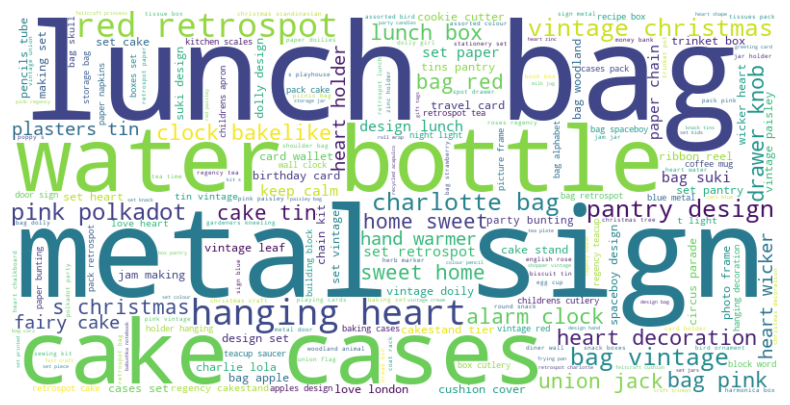

In [81]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag



# Convert the 'Description' column to string type
df['Description'] = df['Description'].astype(str)

# Tokenize the descriptions
tokens = [word_tokenize(desc.lower()) for desc in df['Description']]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_no_stop = [[word for word in desc if word not in stop_words] for desc in tokens]

# Remove adjectives
tokens_no_adj = []
for desc in tokens_no_stop:
    tagged_desc = pos_tag(desc)
    desc_no_adj = [word for word, tag in tagged_desc if tag != 'JJ']
    tokens_no_adj.append(desc_no_adj)

# Flatten the token list
flat_tokens = [word for desc in tokens_no_adj for word in desc]

# Join the words into a single string
text = ' '.join(flat_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [83]:
import plotly.graph_objects as go

# Get the top 5 descriptions
top_descriptions = df['Description'].value_counts().head(10)

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=top_descriptions.index, values=top_descriptions.values)])

# Set the chart title
fig.update_layout(title='Top 10 Descriptions')

# Show the chart
fig.show()


In [85]:
# Filter the dataframe to include only repeating customers
repeating_customers = df[df['CustomerID'].duplicated(keep=False)]

# Group the data by CustomerID and Description, and count the occurrences
purchase_history = repeating_customers.groupby(['CustomerID', 'Description']).size().reset_index(name='PurchaseCount')

# Sort the purchase history by PurchaseCount in descending order
purchase_history = purchase_history.sort_values('PurchaseCount', ascending=False)

# Identify the top repeating customers
top_repeating_customers = purchase_history['CustomerID'].unique()[:5]

# Filter the purchase history for the top repeating customers
top_repeating_customers_history = purchase_history[purchase_history['CustomerID'].isin(top_repeating_customers)]

# Print the purchase history for the top repeating customers
print(top_repeating_customers_history)


        CustomerID                          Description  PurchaseCount
119020     14911.0                             CARRIAGE             85
251665     17841.0                        CHILLI LIGHTS             65
120018     14911.0             REGENCY CAKESTAND 3 TIER             56
251577     17841.0     BLUE/CREAM STRIPE CUSHION COVER              54
252178     17841.0       PACK OF 60 DINOSAUR CAKE CASES             54
...            ...                                  ...            ...
98910      14527.0       CHRISTMAS TREE STAR DECORATION              1
98914      14527.0        CUSHION COVER PINK UNION JACK              1
98915      14527.0  DECORATION  PINK CHICK MAGIC GARDEN              1
98916      14527.0  DECORATION WHITE CHICK MAGIC GARDEN              1
98918      14527.0  DISCO BALL ROTATOR BATTERY OPERATED              1

[3927 rows x 3 columns]


It can be inferred that customers are buying cake cases, decorative and gift items and the sales during november and december are high. Most importantly if you oberserve Sales in cold countries are high.. 

In [87]:
# Create a cross-tabulation table
cross_tab = pd.crosstab(df['Description'], df['month'])

# Print the cross-tabulation table
print(cross_tab)


month                           1   2   3   4   5   6   7   8   9   10  11  12
Description                                                                   
 4 PURPLE FLOCK DINNER CANDLES   2   1   0   4   2   1   2   1   3   3  14   8
 50'S CHRISTMAS GIFT BAG LARGE   0   0   0   0   0   0   0   3  22  53  39  13
 DOLLY GIRL BEAKER               0   0   0   0   0   0  12  51  32  29  42  15
 I LOVE LONDON MINI BACKPACK     0   0   0   0   0   0   0   0  29  23  28   8
 I LOVE LONDON MINI RUCKSACK     0   0   0   0   0   0   0   0   0   1   0   0
...                             ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
wrongly marked carton 22804      0   0   0   0   0   0   0   0   0   0   1   0
wrongly marked. 23343 in box     0   0   0   0   0   0   1   0   0   0   0   0
wrongly sold (22719) barcode     0   0   1   0   0   0   0   0   0   0   0   0
wrongly sold as sets             0   0   1   0   0   0   0   0   0   0   0   0
wrongly sold sets                0   0   1   0   0  

In [92]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['Description'], df['month'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the chi-square test statistic and p-value
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)


Chi-square test statistic: 314893.8494935895
p-value: 0.0


In [94]:
import scipy.stats as stats

# Filter data for cold months (e.g., December, January, February)
cold_months = [10,11,12, 1, 2]
filtered_data = df[df['month'].isin(cold_months)]

# Create a contingency table of products purchased and month
contingency_table = pd.crosstab(filtered_data['Description'], filtered_data['month'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the chi-square test statistic and p-value
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)


Chi-square test statistic: 110433.2204235485
p-value: 0.0
